#Loading the dataset

Import the libraries

In [99]:
import pandas as pd
import math
from numpy import median
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import xgboost as xg
import seaborn as s
from sklearn.linear_model import LinearRegression

load the dataset

In [61]:
df=pd.read_csv("dataset.csv")

the first 5 rows of the data

In [62]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Data preprocessing

To find the names of the coulmns

In [63]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

 To find shape of the data

In [64]:
df.shape

(506, 14)

To display the central tendencies and dispersion measures

In [65]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


To find the null values in a data

In [66]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Dealing with null values

In [67]:
df["CHAS"]=df["CHAS"].fillna(df["CHAS"].mode()[0])
df["AGE"]=df["AGE"].fillna(df["AGE"].mode()[0])
df=df.fillna(df.mean())

To find whether the null values are replaced

In [68]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#EDA

*Visualization of variables*

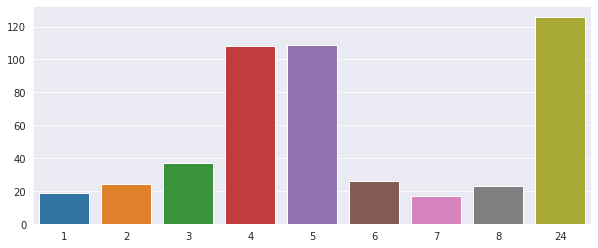

In [106]:
l_s = df.RAD.value_counts()
s.set_style("darkgrid")
plt.figure(figsize=(10,4))
s.barplot(x=l_s.index, y=l_s.values,data=df)
plt.show()

- most of the houses have access to 24hrs highways

visualization of outliers in variable RM

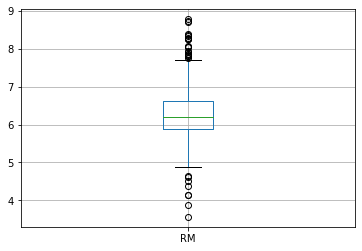

In [69]:
df.boxplot("RM")

*To find correlation between variables*

In [70]:
a=df.corr()

*To visualize the correlation of variables*

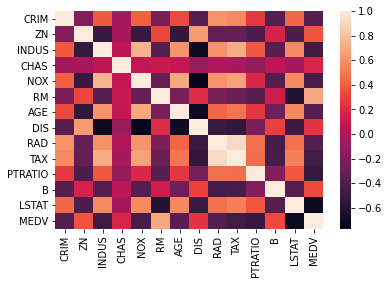

In [71]:
s.heatmap(df.corr())

*Display the types of correlation with target variable*

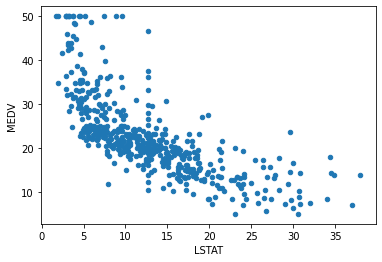

In [72]:
df.plot.scatter(x="LSTAT",y="MEDV")

- negatively correlated

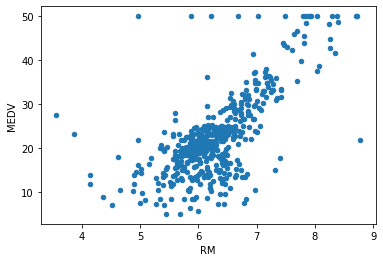

In [73]:
df.plot.scatter(x="RM",y="MEDV")

- positively correlated

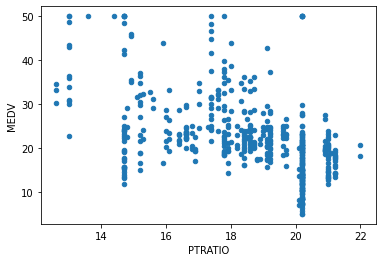

In [74]:
df.plot.scatter(x="PTRATIO",y="MEDV")

- moderately correlated

#Feature selection

*To find highly posistive/negative correlated variables*

In [75]:
cor_target = abs(a["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.721975
MEDV       1.000000
Name: MEDV, dtype: float64

In [76]:
print(df[["LSTAT","PTRATIO"]].corr())
print(df[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.373343
PTRATIO  0.373343  1.000000
             RM     LSTAT
RM     1.000000 -0.602962
LSTAT -0.602962  1.000000


*To drop the outliers present in the target variable(MEDV) and variable(RM)*

In [77]:
df.drop(df.loc[df["MEDV"]==50].index,inplace=True)
df.drop(df.loc[df["RM"]==8.78].index,inplace=True)

*The shape of data after dropping varaibles*

In [78]:
df.shape

(489, 14)

*To initialize the train and test data*

In [79]:
X=["RM","LSTAT","PTRATIO"]
Y=["MEDV"]
train=df[X]
test=df[Y]

#Fitting of a model

*Splitting the data into train and test datasets*

In [80]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = .3, random_state = 0)

*Using linear regression*

In [81]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_predlr= lr.predict(X_test)

*rmse value of a model*

In [82]:
math.sqrt(mean_squared_error(y_test,y_predlr))

4.735115204624319

*r2 score of a model (fit of a model)*

In [83]:
r2_score(y_test,y_predlr)

0.6592049438486965

*Using xgboost regressor*

In [84]:
xgl=xg.XGBRegressor(n_estimators=1000,learning_rate=0.05)
xgl.fit(X_train,y_train)

[18:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

*To predict the values*

In [85]:
y_predxg=xgl.predict(X_test)

*To predict the values for train data*

In [86]:
y_predx1=xgl.predict(X_train)

*rmse of training data*

In [87]:
math.sqrt(mean_squared_error(y_train,y_predx1))

0.9214249813644365

*rmse of the test data*

In [88]:
math.sqrt(mean_squared_error(y_test,y_predxg))

3.641710558557784

*r2 score of the model*

In [89]:
r2_score(y_test,y_predxg)

0.7984220440848401

*The xgbregressor gives the model with low rmse and high r2 score as compared to linear regression*